In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats 
from scipy.stats import zscore
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [13]:
#Loading the dataset
df = pd.read_csv("../data/togo-dapaong_qc.csv")

In [14]:
df.describe() #stat

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

In [15]:
df.isna().sum() #missing values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [16]:
missing_percentage = df.isna().mean() * 100
high_null_columns = missing_percentage[missing_percentage > 5]

print("Columns with >5% missing values:")
print(high_null_columns)

Columns with >5% missing values:
Comments    100.0
dtype: float64


In [17]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'] #outliers of these
z_scores = df[cols_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3)
print("Outlier counts per column (|Z| > 3):")
print(outliers.sum())

Outlier counts per column (|Z| > 3):
GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64


In [18]:
df[cols_to_check] = df[cols_to_check].mask(outliers) #make outliers NaN

In [19]:
df_clean = df.copy() #make missing values median
for col in cols_to_check:
    median_value = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_value)

In [20]:
df_clean.to_csv("../data/togo_clean.csv", index=False)

In [21]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])


c:\Users\PC\OneDrive\Desktop\Project\solar-challenge-week1\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


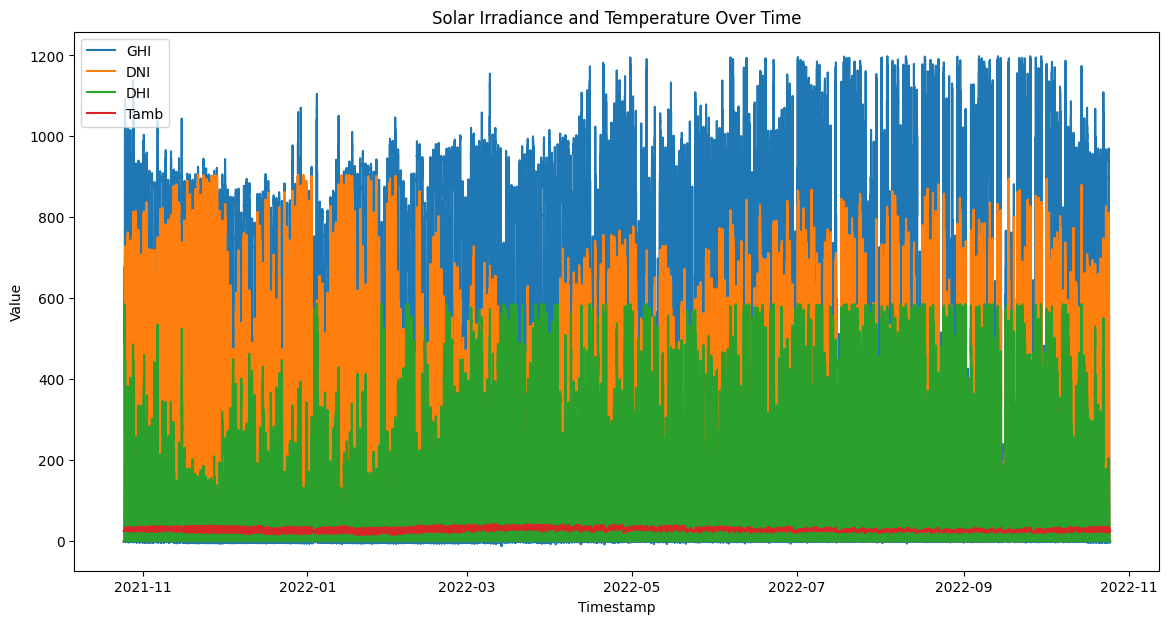

In [22]:
plt.figure(figsize=(14, 7))

plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI')
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI')
plt.plot(df_clean['Timestamp'], df_clean['Tamb'], label='Tamb')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Solar Irradiance and Temperature Over Time')
plt.legend()
plt.show()

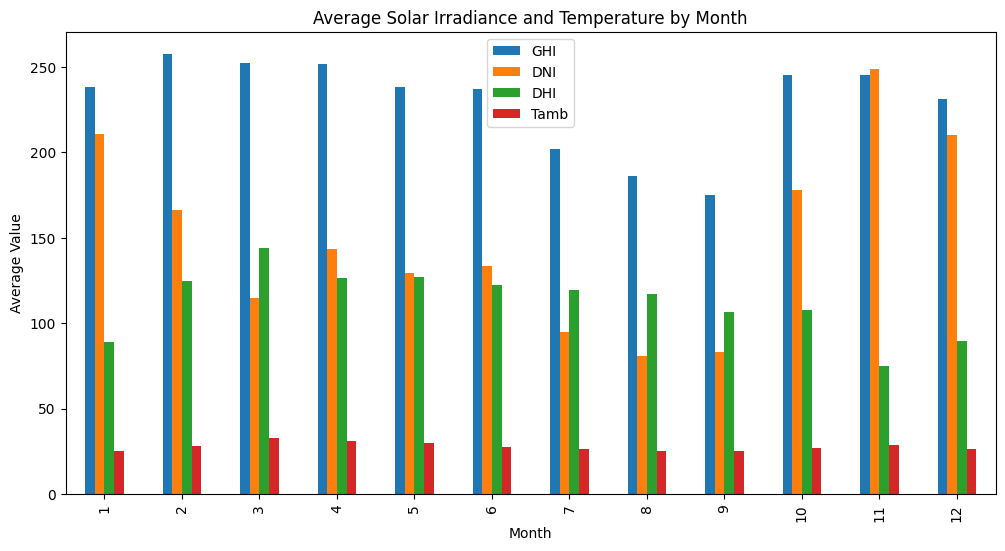

In [23]:
df_clean['Month'] = df_clean['Timestamp'].dt.month

monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Average Solar Irradiance and Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.show()

In [24]:
cols = ['GHI', 'DNI', 'DHI', 'Tamb']

# Compute z-scores
z_scores_clean = df_clean[cols].apply(zscore)

# Identify rows where any absolute z-score > 3
outliers_clean = (z_scores_clean.abs() > 3).any(axis=1)
df_outliers_clean = df_clean[outliers_clean]

In [25]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)
df_outliers_clean.set_index('Timestamp', inplace=True)

c:\Users\PC\OneDrive\Desktop\Project\solar-challenge-week1\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


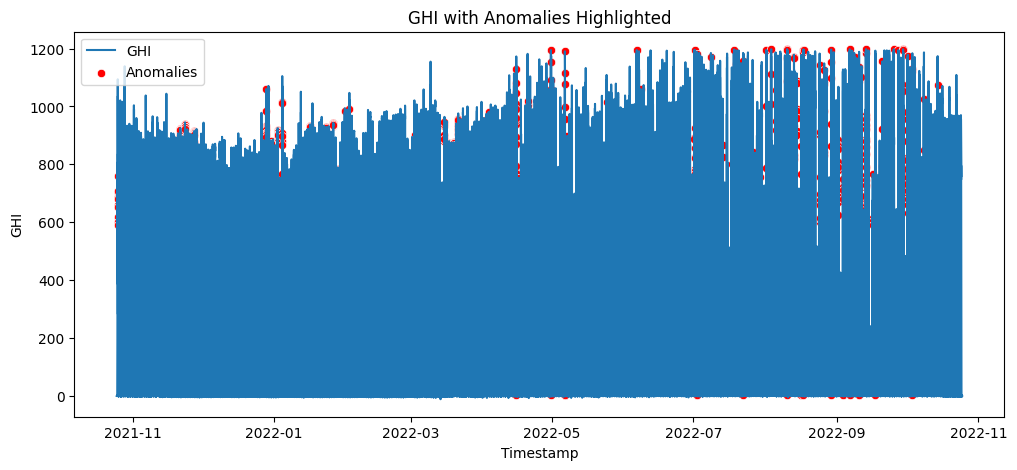

In [26]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_clean, x=df_clean.index, y='GHI', label='GHI')
sns.scatterplot(data=df_outliers_clean, x=df_outliers_clean.index, y='GHI', color='red', label='Anomalies')
plt.title("GHI with Anomalies Highlighted")
plt.legend()
plt.show()

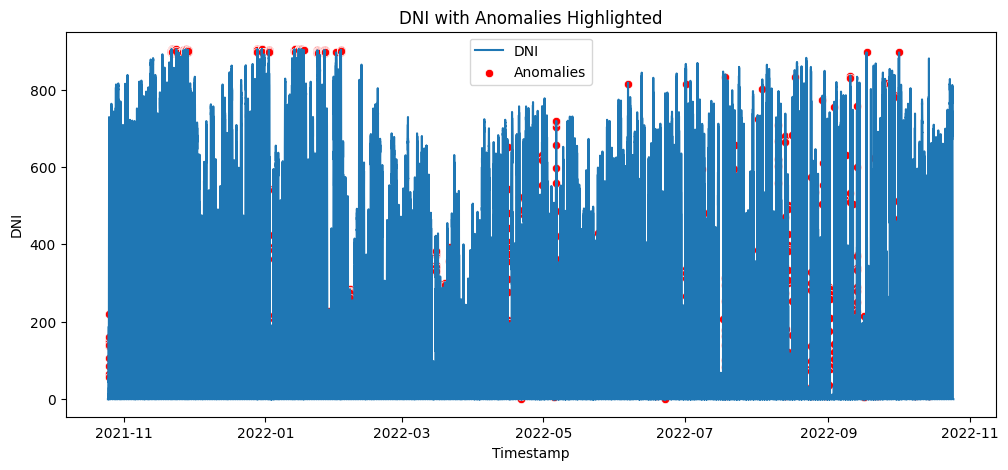

In [27]:
plt.figure(figsize=(12, 5)) 
sns.lineplot(data=df_clean, x=df_clean.index, y='DNI', label='DNI')
sns.scatterplot(data=df_outliers_clean, x=df_outliers_clean.index, y='DNI', color='red', label='Anomalies')
plt.title("DNI with Anomalies Highlighted")
plt.legend()
plt.show()

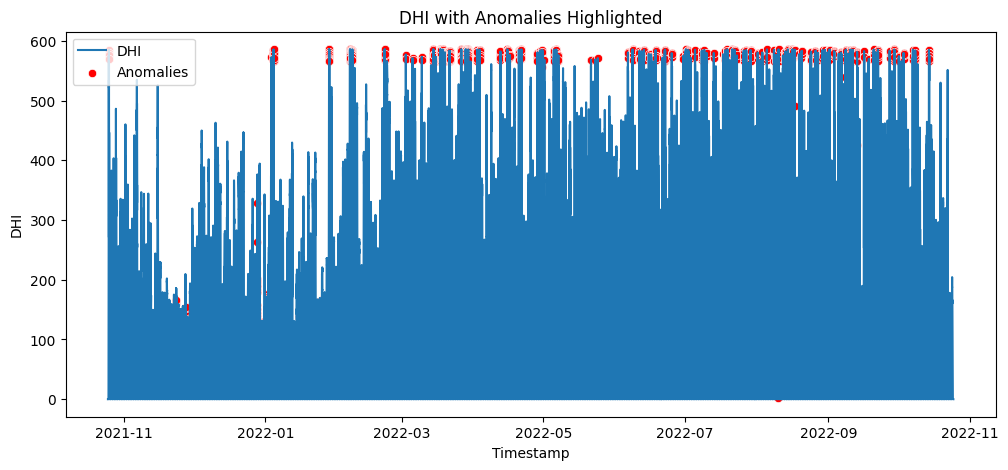

In [28]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_clean, x=df_clean.index, y='DHI', label='DHI')
sns.scatterplot(data=df_outliers_clean, x=df_outliers_clean.index, y='DHI', color='red', label='Anomalies')
plt.title("DHI with Anomalies Highlighted")
plt.legend()
plt.show()


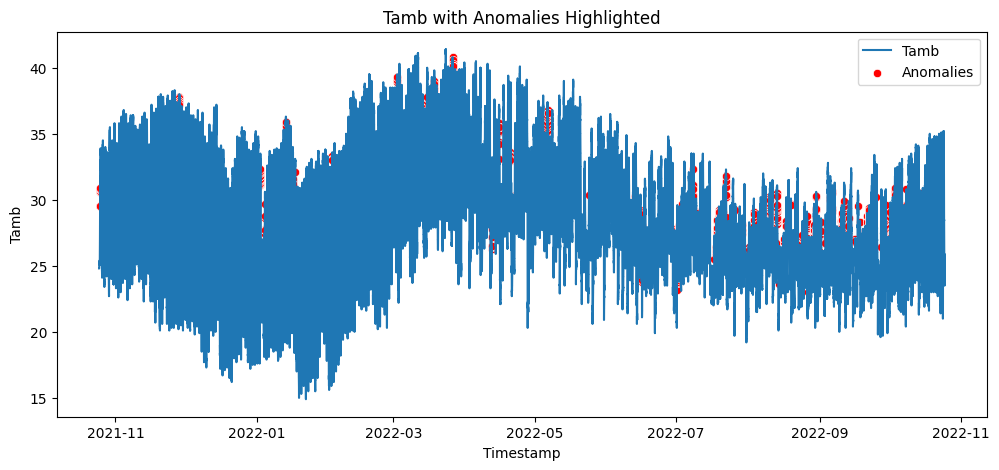

In [29]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_clean, x=df_clean.index, y='Tamb', label='Tamb')
sns.scatterplot(data=df_outliers_clean, x=df_outliers_clean.index, y='Tamb', color='red', label='Anomalies')
plt.title("Tamb with Anomalies Highlighted")
plt.legend()
plt.show()


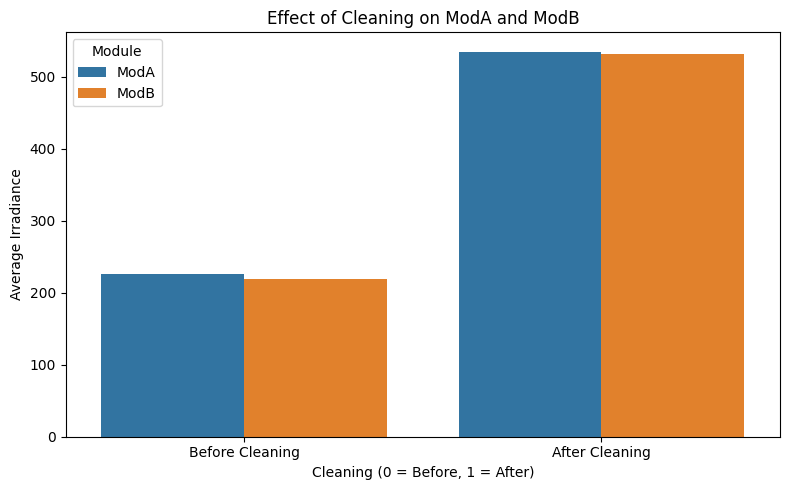

In [30]:
#Cleaning effect on ModA and ModB
cleaning_effect = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Melt the dataframe for better Seaborn plotting
melted = cleaning_effect.melt(id_vars='Cleaning', value_vars=['ModA', 'ModB'],
                               var_name='Module', value_name='Average Irradiance')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=melted, x='Cleaning', y='Average Irradiance', hue='Module')
plt.title('Effect of Cleaning on ModA and ModB')
plt.xlabel('Cleaning (0 = Before, 1 = After)')
plt.ylabel('Average Irradiance')
plt.xticks([0, 1], ['Before Cleaning', 'After Cleaning'])
plt.tight_layout()
plt.show()

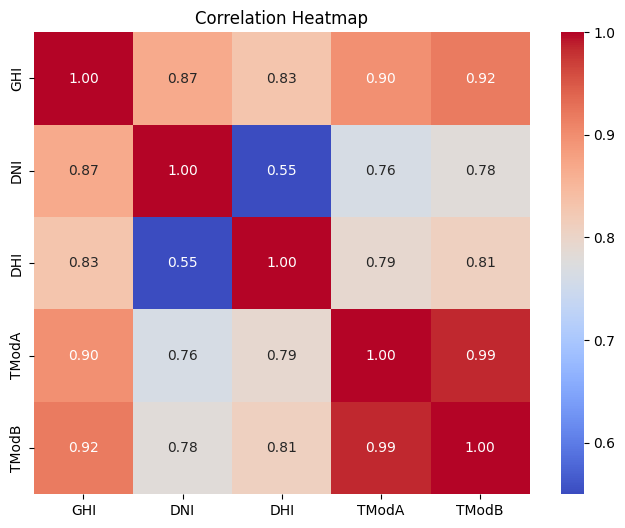

In [31]:
#Heatmap of Correlations
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

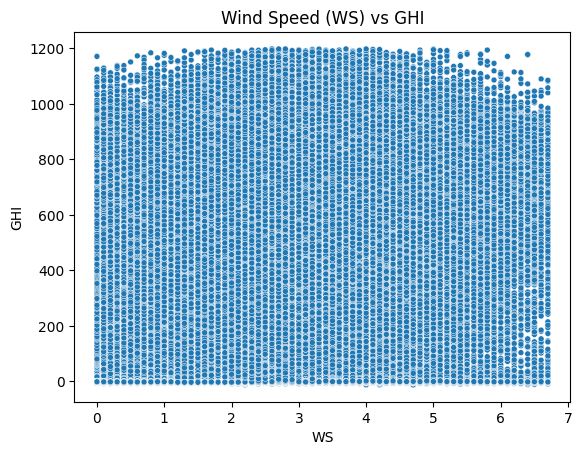

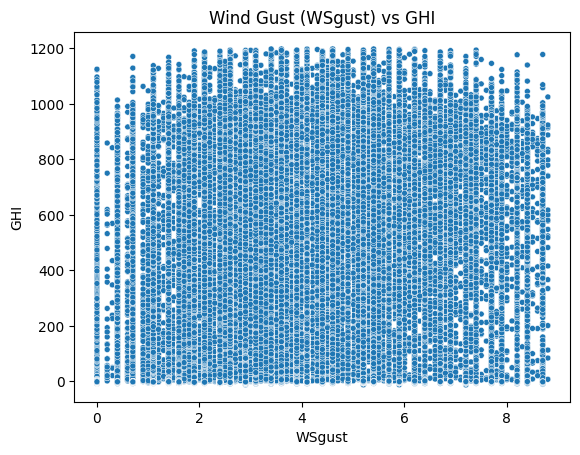

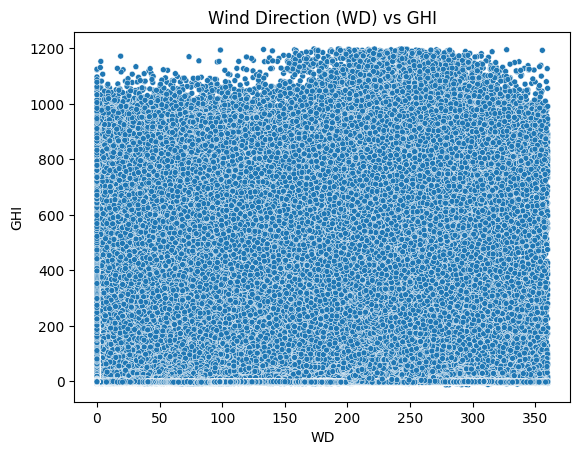

In [32]:
#Scatter plots: WS, WSgust, WD vs. GHI
# WS vs. GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI', size=1, legend=False)
plt.title('Wind Speed (WS) vs GHI')
plt.show()

# WSgust vs. GHI
sns.scatterplot(data=df_clean, x='WSgust', y='GHI', size=1, legend=False)
plt.title('Wind Gust (WSgust) vs GHI')
plt.show()

# WD vs. GHI
sns.scatterplot(data=df_clean, x='WD', y='GHI', size=1, legend=False)
plt.title('Wind Direction (WD) vs GHI')
plt.show()


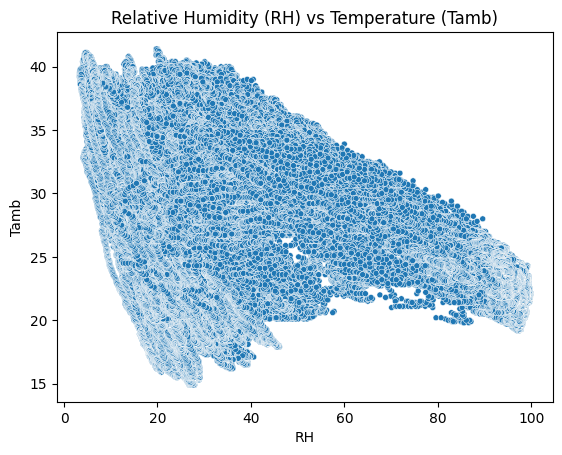

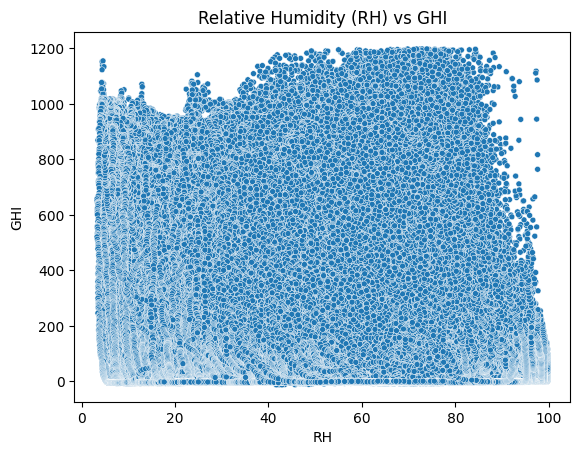

In [33]:
# RH vs. Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb', size=1, legend=False)
plt.title('Relative Humidity (RH) vs Temperature (Tamb)')
plt.show()

# RH vs. GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI', size=1, legend=False)
plt.title('Relative Humidity (RH) vs GHI')
plt.show()

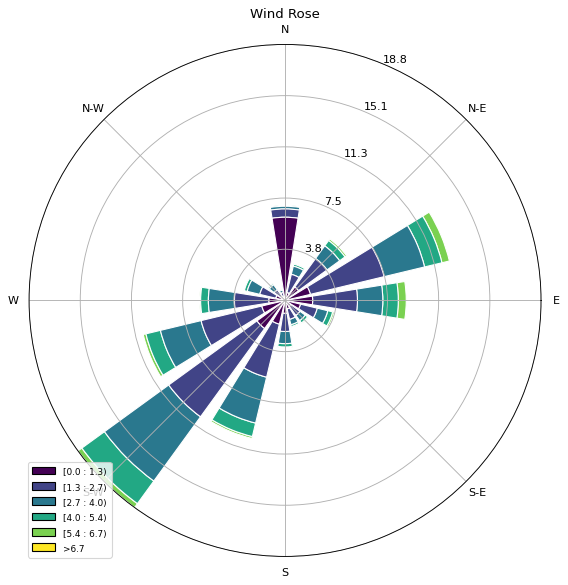

In [34]:
#Wind rose or radial bar plot of WS/WD
df_wind = df_clean[['WS', 'WD']].dropna()

ax = WindroseAxes.from_ax()
ax.bar(df_wind['WD'], df_wind['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()

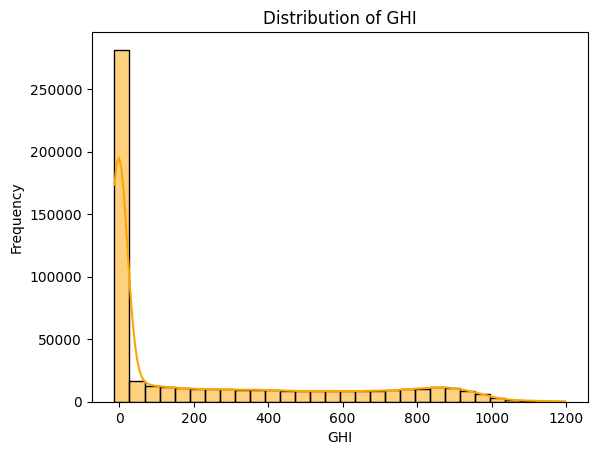

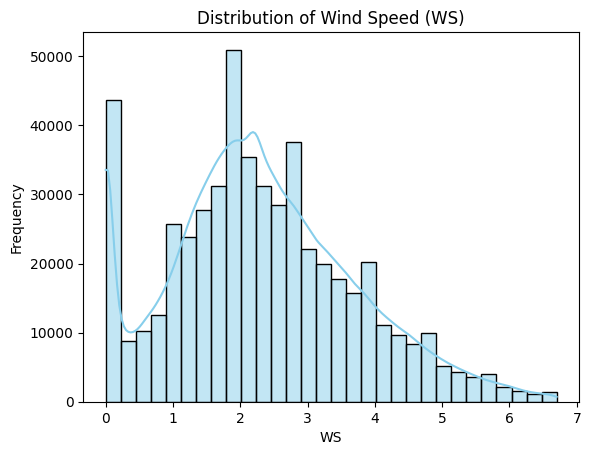

In [35]:
#Histograms of of GHI and WS:
# Histogram for GHI
sns.histplot(df_clean['GHI'], kde=True, bins=30, color='orange')
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

# Histogram for WS
sns.histplot(df_clean['WS'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.show()

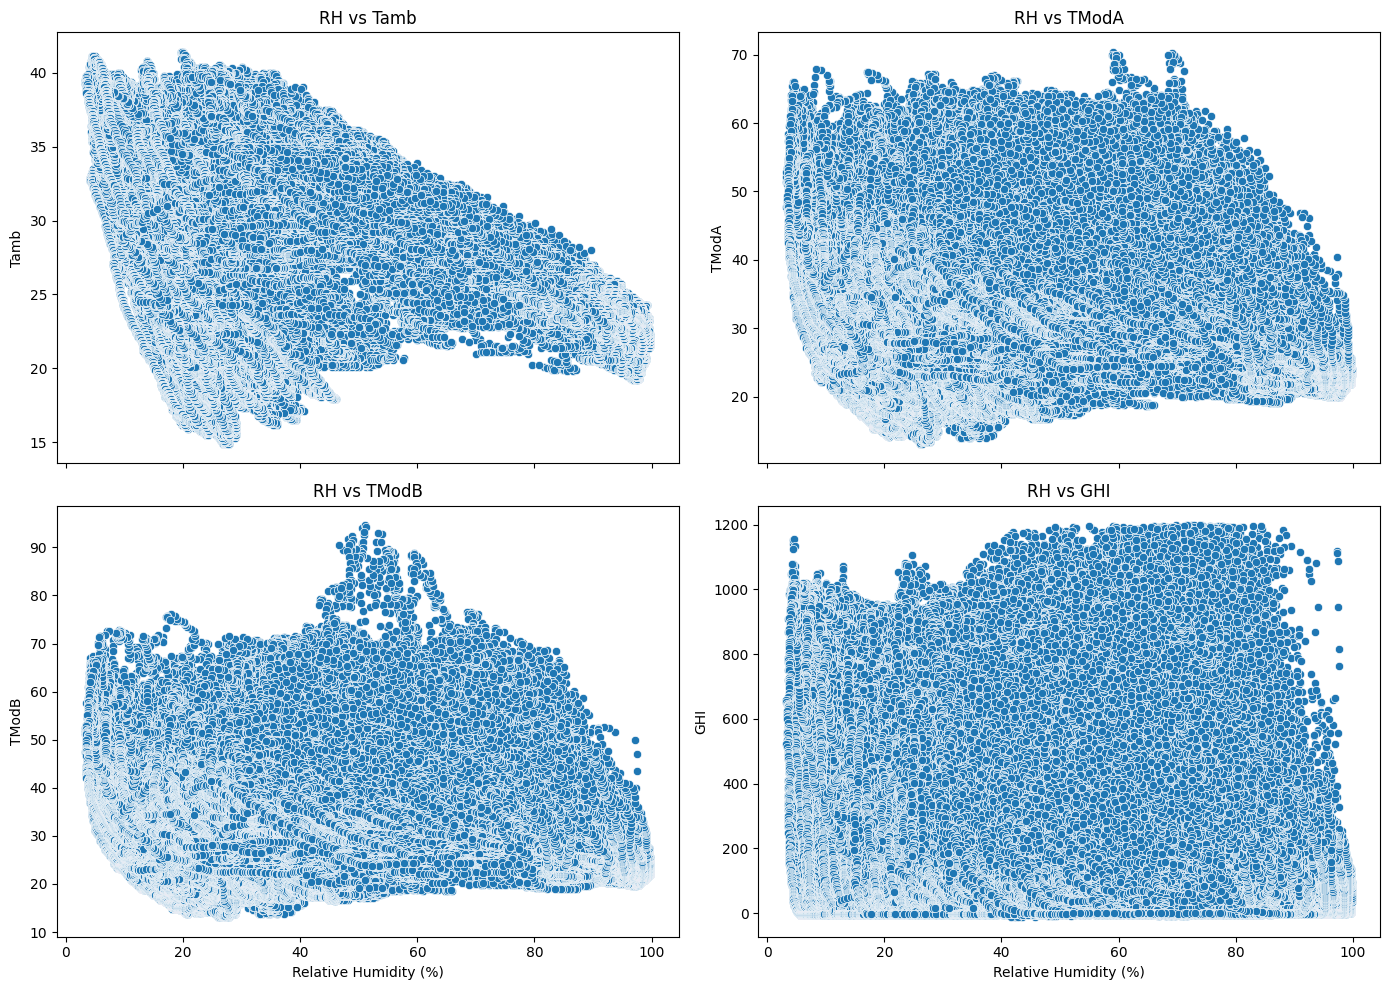

In [36]:
#Relative humidity with temperature readings and solar radiation.

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# RH vs Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb', ax=axs[0, 0])
axs[0, 0].set_title('RH vs Tamb')

# RH vs TModA
sns.scatterplot(data=df_clean, x='RH', y='TModA', ax=axs[0, 1])
axs[0, 1].set_title('RH vs TModA')

# RH vs TModB
sns.scatterplot(data=df_clean, x='RH', y='TModB', ax=axs[1, 0])
axs[1, 0].set_title('RH vs TModB')

# RH vs GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI', ax=axs[1, 1])
axs[1, 1].set_title('RH vs GHI')

# Add a shared X label
for ax in axs.flat:
    ax.set_xlabel('Relative Humidity (%)')

plt.tight_layout()
plt.show()

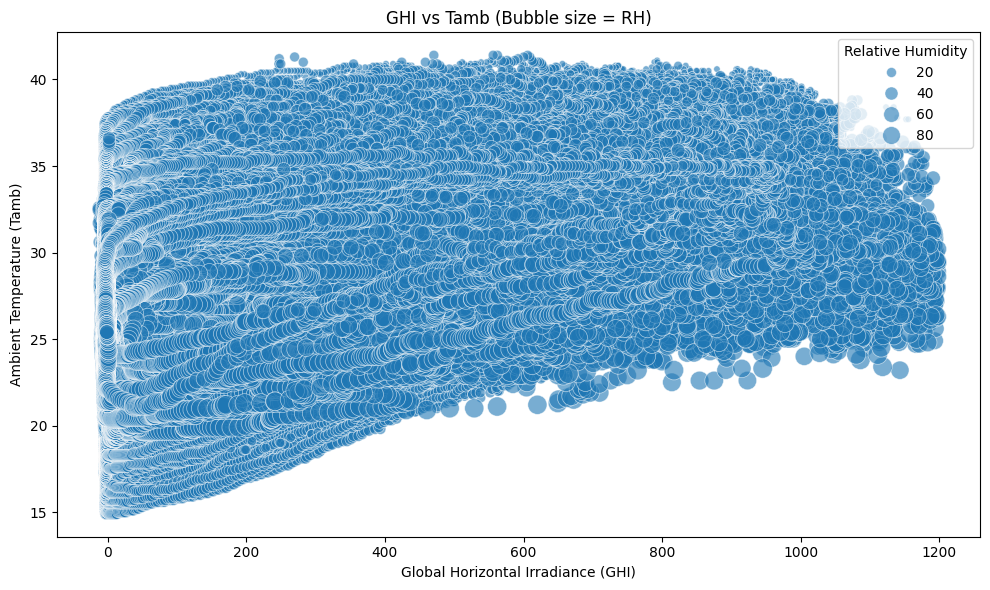

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean, 
    x='GHI', 
    y='Tamb', 
    size='RH', 
    sizes=(20, 200), 
    alpha=0.6
)
plt.title('GHI vs Tamb (Bubble size = RH)')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.legend(title='Relative Humidity', loc='upper right')
plt.tight_layout()
plt.show()
